In [1]:
import numpy as np
from astropy.io import fits

from pylab import *
%matplotlib notebook

In [2]:
fname = '/home/ban115/tmp/wed_debug_1.fits'
fname = '/home/ban115/tmp/wed_debug_noswap_2.fits'
f = open(fname, 'rb')

In [3]:
f.seek(0)
hdr = f.read(2880*3)
print(hdr)

b"SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [4]:
from craco.cardcap import get_single_packet_dtype
nant = 30
npol = 2
samp_per_int = 64 # samples per integration = 
samp_per_frame = 2048
int_per_frame = samp_per_frame // samp_per_int
nprod = nant*(nant+1)//2*npol 
print(f'nprod={nprod}')
dtype = get_single_packet_dtype(nprod, True)
packets_per_frame = int_per_frame * 36 * 4
print(packets_per_frame)
dtype

nprod=930
4608


dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [36]:
f.seek(2880*3) #skip over the FITS header
packets = np.fromfile(f, dtype=dtype, count=4000*2*100)

<IPython.core.display.Javascript object>


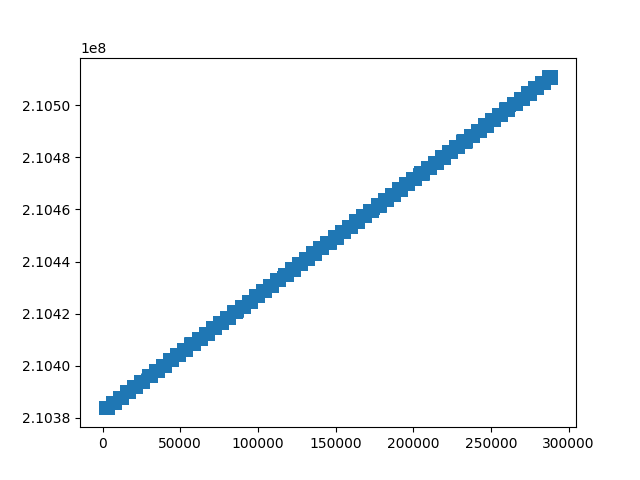

In [37]:
figure()
plot(packets['frame_id'],'x')


In [7]:
frame_id = packets['frame_id']
fdiff= frame_id[1:] - frame_id[:-1]
print(frame_id[0])
print(frame_id[packets_per_frame])
frame_id[packets_per_frame] - frame_id[0]

210382880
210384928


2048

<IPython.core.display.Javascript object>


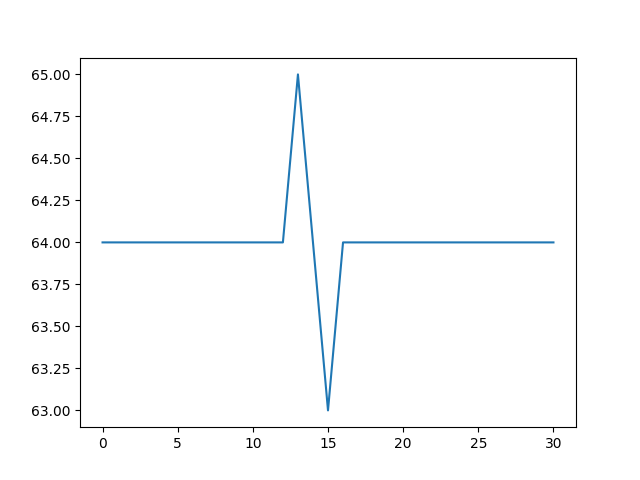

In [8]:
figure()

plot(fdiff[:31])

In [9]:
packets[0]

(210382880, 930654975841, 0, 1, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [  1160,  14700], [ 15406,  14705], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [  1160,  14700], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0],

In [10]:
packets[30]

(210384800, 930654976550, 0, 61, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ 16355,  11040], [ 17580,  11039], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ 16355,  11040], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0]

<IPython.core.display.Javascript object>


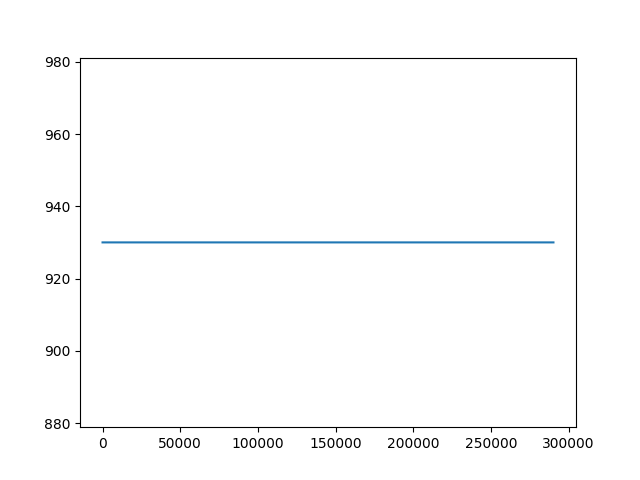

In [11]:
figure()

plot(packets['nprod'])

<IPython.core.display.Javascript object>


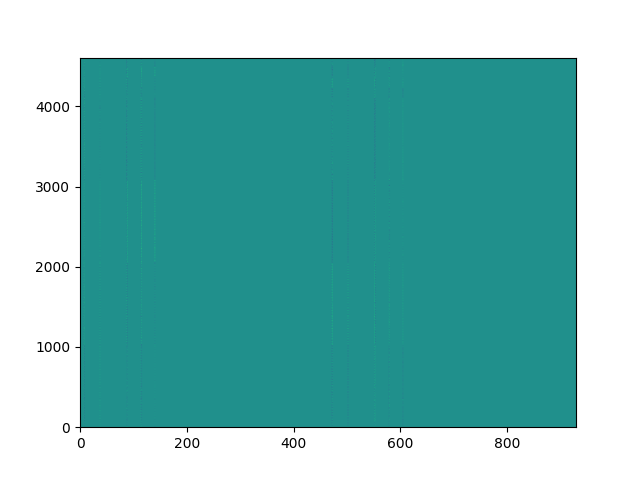

In [12]:
fig = figure()
imshow(packets['data'][:packets_per_frame,:,0], origin='lower', aspect='auto')
fig.fig_size_inches = (12,10)

<IPython.core.display.Javascript object>


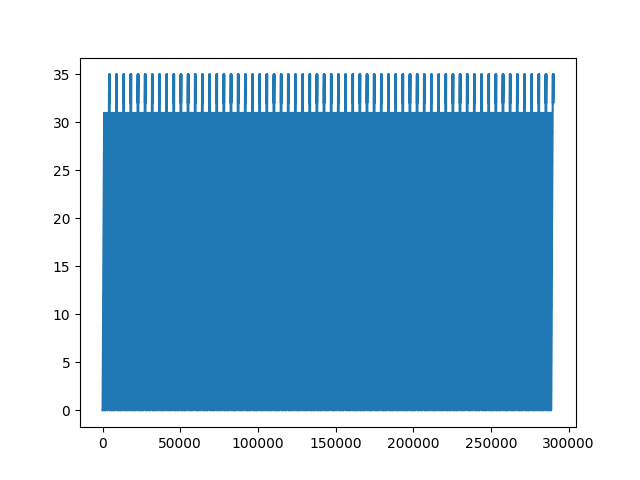

In [13]:
figure()
plot(packets['beam_number'])

In [14]:
nbytes=17289216

In [15]:
dtype.itemsize

3752

In [16]:
nbytes / dtype.itemsize

4608.0

In [17]:
npkts = 36*4*2048//32//2

In [18]:
npkts

4608

In [19]:
packets['frame_id'][:16]

array([210382880, 210382944, 210383008, 210383072, 210383136, 210383200,
       210383264, 210383328, 210383392, 210383456, 210383520, 210383584,
       210383648, 210383712, 210383777, 210383841], dtype=uint64)

In [20]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [21]:
list(map(hex, packets['frame_id'][:16]))

['0xc8a3020',
 '0xc8a3060',
 '0xc8a30a0',
 '0xc8a30e0',
 '0xc8a3120',
 '0xc8a3160',
 '0xc8a31a0',
 '0xc8a31e0',
 '0xc8a3220',
 '0xc8a3260',
 '0xc8a32a0',
 '0xc8a32e0',
 '0xc8a3320',
 '0xc8a3360',
 '0xc8a33a1',
 '0xc8a33e1']

In [22]:
import binascii
for ipkt in range(npkts*2):
    f.seek(2880*3 + ipkt*dtype.itemsize)
    b = f.read(48)
    print(f'{ipkt:04d}', binascii.hexlify(b))
    

0000 b'20308a0c0000000061f75bafd800000000010000a20304001fb473770000000000000000000000000000000000000000'
0001 b'60308a0c0000000079f75bafd800000000030000a20304001fb473770000000000000000000000000000000000000000'
0002 b'a0308a0c0000000090f75bafd800000000050000a20304001fb473770000000000000000000000000000000000000000'
0003 b'e0308a0c00000000a8f75bafd800000000070000a20304001fb473770000000000000000000000000000000000000000'
0004 b'20318a0c00000000bff75bafd800000000090000a20304001fb473770000000000000000000000000000000000000000'
0005 b'60318a0c00000000d7f75bafd8000000000b0000a20304001fb473770000000000000000000000000000000000000000'
0006 b'a0318a0c00000000eff75bafd8000000000d0000a20304001fb473770000000000000000000000000000000000000000'
0007 b'e0318a0c0000000006f85bafd8000000000f0000a20304001fb473770000000000000000000000000000000000000000'
0008 b'20328a0c000000001ef85bafd800000000110000a20304001fb473770000000000000000000000000000000000000000'
0009 b'60328a0c0000000036f85bafd800000000130000a2030400

1050 b'a0368a0c0000000004595cafd800000000350100a20304001fb473770000000000000000000000000000000000000000'
1051 b'e0368a0c000000001c595cafd800000000370100a20304001fb473770000000000000000000000000000000000000000'
1052 b'20378a0c0000000033595cafd800000000390100a20304001fb473770000000000000000000000000000000000000000'
1053 b'60378a0c000000004b595cafd8000000003b0100a20304001fb473770000000000000000000000000000000000000000'
1054 b'a0378a0c0000000063595cafd8000000003d0100a20304001fb473770000000000000000000000000000000000000000'
1055 b'e0378a0c000000007c595cafd8000000003f0100a20304001fb473770000000000000000000000000000000000000000'
1056 b'20308a0c0000000098595cafd800000001010100a20304001fb473770000000000000000000000000000000000000000'
1057 b'60308a0c00000000b0595cafd800000001030100a20304001fb473770000000000000000000000000000000000000000'
1058 b'a0308a0c00000000c7595cafd800000001050100a20304001fb473770000000000000000000000000000000000000000'
1059 b'e0308a0c00000000df595cafd800000001070100a2030400

2042 b'a1368a0c0000000047b55cafd80000001f350100a20304001fb473770000000000000000000000000000000000000000'
2043 b'e1368a0c000000005fb55cafd80000001f370100a20304001fb473770000000000000000000000000000000000000000'
2044 b'20378a0c0000000077b55cafd80000001f390100a20304001fb473770000000000000000000000000000000000000000'
2045 b'60378a0c000000008eb55cafd80000001f3b0100a20304001fb473770000000000000000000000000000000000000000'
2046 b'a0378a0c00000000a6b55cafd80000001f3d0100a20304001fb473770000000000000000000000000000000000000000'
2047 b'e0378a0c00000000bfb55cafd80000001f3f0100a20304001fb473770000000000000000000000000000000000000000'
2048 b'20308a0c00000000dbb55cafd800000000010200a20304001fb473770000000000000000000000000000000000000000'
2049 b'60308a0c00000000f3b55cafd800000000030200a20304001fb473770000000000000000000000000000000000000000'
2050 b'a0308a0c000000000ab65cafd800000000050200a20304001fb473770000000000000000000000000000000000000000'
2051 b'e0308a0c0000000022b65cafd800000000070200a2030400

3068 b'20378a0c00000000b4145dafd80000001f390200a20304001fb473770000000000000000000000000000000000000000'
3069 b'60378a0c00000000cb145dafd80000001f3b0200a20304001fb473770000000000000000000000000000000000000000'
3070 b'a0378a0c00000000e3145dafd80000001f3d0200a20304001fb473770000000000000000000000000000000000000000'
3071 b'e0378a0c00000000fc145dafd80000001f3f0200a20304001fb473770000000000000000000000000000000000000000'
3072 b'20308a0c0000000018155dafd800000000010300a20304001fb473770000000000000000000000000000000000000000'
3073 b'60308a0c0000000030155dafd800000000030300a20304001fb473770000000000000000000000000000000000000000'
3074 b'a0308a0c0000000047155dafd800000000050300a20304001fb473770000000000000000000000000000000000000000'
3075 b'e0308a0c000000005f155dafd800000000070300a20304001fb473770000000000000000000000000000000000000000'
3076 b'20318a0c0000000076155dafd800000000090300a20304001fb473770000000000000000000000000000000000000000'
3077 b'60318a0c000000008e155dafd8000000000b0300a2030400

4128 b'20308a0c000000004f775dafd800000021010000a20304001fb473770000000000000000000000000000000000000000'
4129 b'60308a0c0000000066775dafd800000021030000a20304001fb473770000000000000000000000000000000000000000'
4130 b'a0308a0c000000007e775dafd800000021050000a20304001fb473770000000000000000000000000000000000000000'
4131 b'e0308a0c0000000096775dafd800000021070000a20304001fb473770000000000000000000000000000000000000000'
4132 b'20318a0c00000000ad775dafd800000021090000a20304001fb473770000000000000000000000000000000000000000'
4133 b'60318a0c00000000c5775dafd8000000210b0000a20304001fb473770000000000000000000000000000000000000000'
4134 b'a0318a0c00000000dd775dafd8000000210d0000a20304001fb473770000000000000000000000000000000000000000'
4135 b'e0318a0c00000000f4775dafd8000000210f0000a20304001fb473770000000000000000000000000000000000000000'
4136 b'20328a0c000000000c785dafd800000021110000a20304001fb473770000000000000000000000000000000000000000'
4137 b'60328a0c0000000024785dafd800000021130000a2030400

5166 b'a03b8a0c0000000044db5dafd8000000111d0000a20304001fb473770000000000000000000000000000000000000000'
5167 b'e03b8a0c000000005cdb5dafd8000000111f0000a20304001fb473770000000000000000000000000000000000000000'
5168 b'203c8a0c0000000073db5dafd800000011210000a20304001fb473770000000000000000000000000000000000000000'
5169 b'603c8a0c000000008bdb5dafd800000011230000a20304001fb473770000000000000000000000000000000000000000'
5170 b'a03c8a0c00000000a3db5dafd800000011250000a20304001fb473770000000000000000000000000000000000000000'
5171 b'e03c8a0c00000000badb5dafd800000011270000a20304001fb473770000000000000000000000000000000000000000'
5172 b'203d8a0c00000000d2db5dafd800000011290000a20304001fb473770000000000000000000000000000000000000000'
5173 b'603d8a0c00000000e9db5dafd8000000112b0000a20304001fb473770000000000000000000000000000000000000000'
5174 b'a03d8a0c0000000001dc5dafd8000000112d0000a20304001fb473770000000000000000000000000000000000000000'
5175 b'e03d8a0c0000000019dc5dafd8000000112f0000a2030400

6216 b'203a8a0c00000000ed3c5eafd800000012110100a20304001fb473770000000000000000000000000000000000000000'
6217 b'603a8a0c00000000053d5eafd800000012130100a20304001fb473770000000000000000000000000000000000000000'
6218 b'a03a8a0c000000001c3d5eafd800000012150100a20304001fb473770000000000000000000000000000000000000000'
6219 b'e03a8a0c00000000343d5eafd800000012170100a20304001fb473770000000000000000000000000000000000000000'
6220 b'213b8a0c000000004c3d5eafd800000012190100a20304001fb473770000000000000000000000000000000000000000'
6221 b'603b8a0c00000000633d5eafd8000000121b0100a20304001fb473770000000000000000000000000000000000000000'
6222 b'a03b8a0c000000007b3d5eafd8000000121d0100a20304001fb473770000000000000000000000000000000000000000'
6223 b'e03b8a0c00000000933d5eafd8000000121f0100a20304001fb473770000000000000000000000000000000000000000'
6224 b'203c8a0c00000000aa3d5eafd800000012210100a20304001fb473770000000000000000000000000000000000000000'
6225 b'603c8a0c00000000c23d5eafd800000012230100a2030400

7252 b'203d8a0c00000000469d5eafd800000012290200a20304001fb473770000000000000000000000000000000000000000'
7253 b'603d8a0c000000005d9d5eafd8000000122b0200a20304001fb473770000000000000000000000000000000000000000'
7254 b'a03d8a0c00000000759d5eafd8000000122d0200a20304001fb473770000000000000000000000000000000000000000'
7255 b'e03d8a0c000000008d9d5eafd8000000122f0200a20304001fb473770000000000000000000000000000000000000000'
7256 b'203e8a0c00000000a49d5eafd800000012310200a20304001fb473770000000000000000000000000000000000000000'
7257 b'603e8a0c00000000bc9d5eafd800000012330200a20304001fb473770000000000000000000000000000000000000000'
7258 b'a03e8a0c00000000d39d5eafd800000012350200a20304001fb473770000000000000000000000000000000000000000'
7259 b'e03e8a0c00000000eb9d5eafd800000012370200a20304001fb473770000000000000000000000000000000000000000'
7260 b'203f8a0c00000000039e5eafd800000012390200a20304001fb473770000000000000000000000000000000000000000'
7261 b'603f8a0c000000001a9e5eafd8000000123b0200a2030400

8282 b'a03e8a0c0000000010fd5eafd800000012350300a20304001fb473770000000000000000000000000000000000000000'
8283 b'e03e8a0c0000000028fd5eafd800000012370300a20304001fb473770000000000000000000000000000000000000000'
8284 b'203f8a0c0000000040fd5eafd800000012390300a20304001fb473770000000000000000000000000000000000000000'
8285 b'603f8a0c0000000057fd5eafd8000000123b0300a20304001fb473770000000000000000000000000000000000000000'
8286 b'a03f8a0c000000006ffd5eafd8000000123d0300a20304001fb473770000000000000000000000000000000000000000'
8287 b'e03f8a0c0000000088fd5eafd8000000123f0300a20304001fb473770000000000000000000000000000000000000000'
8288 b'20388a0c00000000a4fd5eafd800000013010300a20304001fb473770000000000000000000000000000000000000000'
8289 b'60388a0c00000000bcfd5eafd800000013030300a20304001fb473770000000000000000000000000000000000000000'
8290 b'a0388a0c00000000d3fd5eafd800000013050300a20304001fb473770000000000000000000000000000000000000000'
8291 b'e0388a0c00000000ebfd5eafd800000013070300a2030400

In [23]:
hex(930)

'0x3a2'

In [24]:
hex(packets[0]['nprod'])

'0x3a2'

In [25]:
print(packets[100].copy())

(210383136, 930654978221, 3, 9, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ -7123, -31879], [  3722, -31879], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ -7123, -31879], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0],

In [26]:
ipkt = 0
f.seek(2880*3 + ipkt*dtype.itemsize)
b = f.read(32)
binascii.hexlify(b)

b'20308a0c0000000061f75bafd800000000010000a20304001fb4737700000000'

In [27]:
binascii.hexlify(b[20:26])

b'a20304001fb4'

In [28]:
f.seek(2880*3)

8640

In [29]:
packets[0]

(210382880, 930654975841, 0, 1, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [  1160,  14700], [ 15406,  14705], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [  1160,  14700], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0],

In [30]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [31]:
packets_per_frame

4608